# data EDA

1. 목적. 라벨링이 되지 않은 데이터의 라벨링

2. 분류 모델 -> 갤럭시 탭, 아이패드 , 기타의 분류.

3. 아이패드만 모아서 구체적인 아이패드 모델의 분야를 분류

4. 추가적인 모델링(rnn),auto

In [287]:
from konlpy.tag import Mecab

mecab = Mecab()
print(mecab.morphs('자연어처리가너무재밌어서밥먹는것도가끔까먹어요'))

['자연어', '처리', '가', '너무', '재밌', '어서', '밥', '먹', '는', '것', '도', '가끔', '까먹', '어요']


In [288]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'

%matplotlib inline

In [289]:
import os
path_to_file = os.getenv('HOME')+'/중고나라_탭_크롤링_100 (version 1).csv'

data = pd.read_csv(path_to_file)

In [290]:
data

,index,title,date
0,0,아이패드 프로 4세대 11 셀룰러 256GB + 펜슬 2세대,20:17
1,1,갤럭시탭s7+ 256기가 와이파이 실버 (정품키보드포함) 팝니다,20:17
2,2,아이패드 에서 4 11인치 와이파이+셀룰러 256기가 새상품급 + 매직키보드폴리오 ...,20:16
3,3,아이패드에어4 256GB 셀룰러+ WIFI 로즈골드 미개봉새상품 팝니다!!!,20:16
4,4,겔럭시 탭a 9.7 with s펜,20:15
...,...,...,...
5345,5345,아이패드 8세대 32GB Wi-Fi 스페이스 그레이 미개봉 팝니다.,21.04.21.
5346,5346,아이패드 8세대 + 애플펜슬 + 케이스 + 액정보호필름여분 판매합니다. Wifi 3...,21.04.21.
5347,5347,lg 10.1 v700n부품용 2만 판매합니다,21.04.21.
5348,5348,지패드3 10.1 LTE V755 팝니다,21.04.21.


In [291]:
tit = data.title

In [294]:
tit

0                       아이패드 프로 4세대 11 셀룰러 256GB + 펜슬 2세대
1                     갤럭시탭s7+ 256기가 와이파이 실버 (정품키보드포함) 팝니다
2       아이패드 에서 4 11인치 와이파이+셀룰러 256기가 새상품급 + 매직키보드폴리오 ...
3              아이패드에어4 256GB 셀룰러+ WIFI 로즈골드 미개봉새상품 팝니다!!!
4                                      겔럭시 탭a 9.7 with s펜
                              ...                        
5345                아이패드 8세대 32GB Wi-Fi 스페이스 그레이 미개봉 팝니다.
5346    아이패드 8세대 + 애플펜슬 + 케이스 + 액정보호필름여분 판매합니다. Wifi 3...
5347                            lg 10.1 v700n부품용 2만 판매합니다
5348                               지패드3 10.1 LTE V755 팝니다
5349                  아이패드 에어 4세대 및 프로 64기가 와이파이 모든색상 팝니다
Name: title, Length: 5350, dtype: object

In [295]:
j = 0 
for i in tit:
    print(i[0])
    print(type(i))
    print(j)
    j += 1 

아
<class 'str'>
0
갤
<class 'str'>
1
아
<class 'str'>
2
아
<class 'str'>
3
겔
<class 'str'>
4
리
<class 'str'>
5
삼
<class 'str'>
6
[
<class 'str'>
7
갤
<class 'str'>
8
아
<class 'str'>
9
아
<class 'str'>
10
애
<class 'str'>
11
갤
<class 'str'>
12
아
<class 'str'>
13
하
<class 'str'>
14
갤
<class 'str'>
15
화
<class 'str'>
16
갤
<class 'str'>
17
아
<class 'str'>
18
갤
<class 'str'>
19
와
<class 'str'>
20
[
<class 'str'>
21
아
<class 'str'>
22
애
<class 'str'>
23
아
<class 'str'>
24
애
<class 'str'>
25
아
<class 'str'>
26
갤
<class 'str'>
27
갤
<class 'str'>
28
갤
<class 'str'>
29
아
<class 'str'>
30
갤
<class 'str'>
31
갤
<class 'str'>
32
아
<class 'str'>
33
갤
<class 'str'>
34
아
<class 'str'>
35
갤
<class 'str'>
36
[
<class 'str'>
37
i
<class 'str'>
38
캘
<class 'str'>
39
갤
<class 'str'>
40
<
<class 'str'>
41
[
<class 'str'>
42
아
<class 'str'>
43
아
<class 'str'>
44
아
<class 'str'>
45
아
<class 'str'>
46
(
<class 'str'>
47
아
<class 'str'>
48
삼
<class 'str'>
49
아
<class 'str'>
50
애
<class 'str'>
51
아
<class 'str'>
52
아
<

<class 'str'>
1204
아
<class 'str'>
1205
[
<class 'str'>
1206
아
<class 'str'>
1207
갤
<class 'str'>
1208
아
<class 'str'>
1209
와
<class 'str'>
1210
(
<class 'str'>
1211
[
<class 'str'>
1212
삼
<class 'str'>
1213
4
<class 'str'>
1214
탭
<class 'str'>
1215
갤
<class 'str'>
1216
아
<class 'str'>
1217
x
<class 'str'>
1218
갤
<class 'str'>
1219
아
<class 'str'>
1220
[
<class 'str'>
1221
갤
<class 'str'>
1222
아
<class 'str'>
1223
오
<class 'str'>
1224
갤
<class 'str'>
1225
아
<class 'str'>
1226
갤
<class 'str'>
1227
아
<class 'str'>
1228
갤
<class 'str'>
1229
갤
<class 'str'>
1230
갤
<class 'str'>
1231
아
<class 'str'>
1232
갤
<class 'str'>
1233
아
<class 'str'>
1234
아
<class 'str'>
1235
(
<class 'str'>
1236
갤
<class 'str'>
1237
대
<class 'str'>
1238
아
<class 'str'>
1239
갤
<class 'str'>
1240
갤
<class 'str'>
1241
갤
<class 'str'>
1242
4
<class 'str'>
1243
갤
<class 'str'>
1244
애
<class 'str'>
1245
아
<class 'str'>
1246
(
<class 'str'>
1247
갤
<class 'str'>
1248
갤
<class 'str'>
1249
아
<class 'str'>
1250
아
<class 'str'>

2443
와
<class 'str'>
2444
인
<class 'str'>
2445
애
<class 'str'>
2446
아
<class 'str'>
2447
아
<class 'str'>
2448
대
<class 'str'>
2449
A
<class 'str'>
2450
갤
<class 'str'>
2451
G
<class 'str'>
2452
(
<class 'str'>
2453
아
<class 'str'>
2454
아
<class 'str'>
2455
갤
<class 'str'>
2456
(
<class 'str'>
2457
아
<class 'str'>
2458
아
<class 'str'>
2459
와
<class 'str'>
2460
아
<class 'str'>
2461
갤
<class 'str'>
2462
갤
<class 'str'>
2463
블
<class 'str'>
2464
완
<class 'str'>
2465
아
<class 'str'>
2466
갤
<class 'str'>
2467
아
<class 'str'>
2468
갤
<class 'str'>
2469
아
<class 'str'>
2470
아
<class 'str'>
2471
갤
<class 'str'>
2472
갤
<class 'str'>
2473
(
<class 'str'>
2474
미
<class 'str'>
2475
아
<class 'str'>
2476
아
<class 'str'>
2477
아
<class 'str'>
2478
[
<class 'str'>
2479
라
<class 'str'>
2480
아
<class 'str'>
2481
갤
<class 'str'>
2482
아
<class 'str'>
2483
태
<class 'str'>
2484
갤
<class 'str'>
2485
아
<class 'str'>
2486
아
<class 'str'>
2487
오
<class 'str'>
2488
아
<class 'str'>
2489
(
<class 'str'>
2490
삼
<class

3601
탭
<class 'str'>
3602
요
<class 'str'>
3603
갤
<class 'str'>
3604
아
<class 'str'>
3605
[
<class 'str'>
3606
아
<class 'str'>
3607
[
<class 'str'>
3608
아
<class 'str'>
3609
아
<class 'str'>
3610
아
<class 'str'>
3611
아
<class 'str'>
3612
갤
<class 'str'>
3613
(
<class 'str'>
3614
갤
<class 'str'>
3615
아
<class 'str'>
3616
아
<class 'str'>
3617
갤
<class 'str'>
3618
아
<class 'str'>
3619
아
<class 'str'>
3620
T
<class 'str'>
3621
미
<class 'str'>
3622
서
<class 'str'>
3623
미
<class 'str'>
3624
아
<class 'str'>
3625
갤
<class 'str'>
3626
아
<class 'str'>
3627
개
<class 'str'>
3628
터
<class 'str'>
3629
갤
<class 'str'>
3630
갤
<class 'str'>
3631
H
<class 'str'>
3632
아
<class 'str'>
3633
아
<class 'str'>
3634
아
<class 'str'>
3635
부
<class 'str'>
3636
아
<class 'str'>
3637
아
<class 'str'>
3638
갤
<class 'str'>
3639
아
<class 'str'>
3640
갤
<class 'str'>
3641
아
<class 'str'>
3642
아
<class 'str'>
3643
아
<class 'str'>
3644
아
<class 'str'>
3645
갤
<class 'str'>
3646
아
<class 'str'>
3647
아
<class 'str'>
3648
[
<class

TypeError: 'float' object is not subscriptable

In [296]:
tit[4034]

nan

In [297]:
data = data.dropna()

In [298]:
data

,index,title,date
0,0,아이패드 프로 4세대 11 셀룰러 256GB + 펜슬 2세대,20:17
1,1,갤럭시탭s7+ 256기가 와이파이 실버 (정품키보드포함) 팝니다,20:17
2,2,아이패드 에서 4 11인치 와이파이+셀룰러 256기가 새상품급 + 매직키보드폴리오 ...,20:16
3,3,아이패드에어4 256GB 셀룰러+ WIFI 로즈골드 미개봉새상품 팝니다!!!,20:16
4,4,겔럭시 탭a 9.7 with s펜,20:15
...,...,...,...
5345,5345,아이패드 8세대 32GB Wi-Fi 스페이스 그레이 미개봉 팝니다.,21.04.21.
5346,5346,아이패드 8세대 + 애플펜슬 + 케이스 + 액정보호필름여분 판매합니다. Wifi 3...,21.04.21.
5347,5347,lg 10.1 v700n부품용 2만 판매합니다,21.04.21.
5348,5348,지패드3 10.1 LTE V755 팝니다,21.04.21.


In [299]:
tit = data.title

공백값이 하나 있어서 오류가 났었습니다.

문장의 최단 길이: 1
문장의 최장 길이: 120
문장의 평균 길이: 30


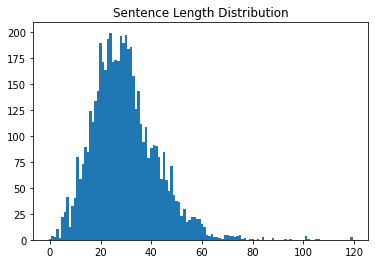

In [300]:
min_len = 999
max_len = 0
sum_len = 0

for sen in tit:
    length = len(sen)
    if min_len > length: min_len = length
    if max_len < length: max_len = length
    sum_len += length

print("문장의 최단 길이:", min_len)
print("문장의 최장 길이:", max_len)
print("문장의 평균 길이:", sum_len // len(tit))

sentence_length = np.zeros((max_len), dtype=np.int)

for sen in tit:
    sentence_length[len(sen)-1] += 1

plt.bar(range(max_len), sentence_length, width=1.0)
plt.title("Sentence Length Distribution")
plt.show()

문장 길이의 분포는 위와 같습니다.

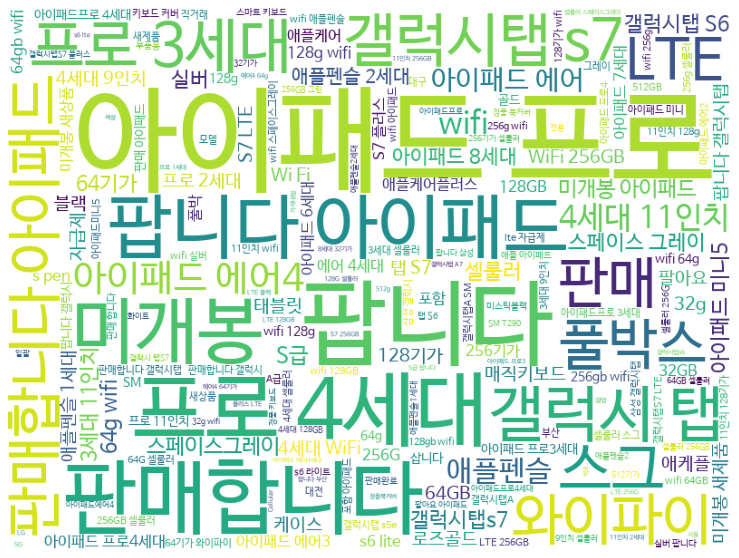

In [301]:
from wordcloud import WordCloud

wordcloud = WordCloud(font_path = fontpath , background_color= 'white', width = 800, height = 600).generate(' '.join(data['title']))

plt.figure(figsize = (15,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

2021 년 4월 21일부터 4월 28일 오후 8시 17분 까지의 데이터

In [302]:
def check_sentence_with_length(tit, length):
    count = 0
    
    for sen in tit:
        if len(sen) == length:
            print(sen)
            count += 1
            if count > 100: return

입력한 길이의 텍스트를 출력해주는 함수입니다.

In [303]:
check_sentence_with_length(tit, 1)

-


In [130]:
check_sentence_with_length(tit, 2)

m6
ㅁㅁ
완료
완료


In [131]:
check_sentence_with_length(tit, 3)

단기탭
와콤원
단기탭


In [132]:
check_sentence_with_length(tit, 4)

판매완료
판매완료
완료 펑
판매완료
아이패드
갤럭시탭
거래완료
거래완료
판매완료
판매완료


In [133]:
check_sentence_with_length(tit, 5)

하프스터디
카드단말기


여기까지는 저희 모델에 별로 필요없는 부분입니다.

길이 6 이상의 문제에는 필요한 부분이 많은것 같습니다.

In [134]:
check_sentence_with_length(tit, 6)

레노버판매중
삼성 ssd
테블릿 급매
갤럭시탭s6
와콤원 판매
(판매완료)
페이퍼 프로
애플워치 3
s7 256
태블릿팝니다
닌텐도dsi
닌텐도3ds
갤럭시탭s7
갤럭시탭s7
멕북에어m1
갤럭시탭A7
테블릿 급매
레노버P10
비와이패드2
갤럭시탭A7
레노버P10
갤럭시탭s7


In [54]:
check_sentence_with_length(tit, 7)

크레마 사운드
웅진 스마트올
애플펜슬2세대
갤럭시탭s7+
갤럭시탭8.9
갤럭시 탭7+
아이패드미니3
크레마 그랑데
아이패드6세대
아이패드에어3
아이패드 프로
갤럭시탭 s6
아이패드미니1
요가탭2윈도우
s펜 플러스2
서피스 프로6
갤럭시탭 s6
애플펜슬 풀박
크레마 사운드
샤오미 미패드
레노버 태블릿
갤럭시탭팝니다
아이패드5세대
갤럭시탭s7+
아이패드미니3
갤럭시탭s7+
크레마 사운드


In [304]:
for i in range(60,121):
    print(f'길이가 {i}인 문장')
    print('\n')
    print(check_sentence_with_length(tit, i))
    print('\n')

길이가 60인 문장


갤럭시 탭 s7플러스 (s7+) 256 lte 자급제 + 강화유리 + 보호필름류 / 급매 84만 (최종가격)
갤럭시 탭S7+ 미스틱 네이비 12기가 ram,512gb,12.4인치 LET...개봉만한 거의 새것.....
[신품급] 아이패드 프로 3세대 11인치 64기가 wifi 스페이스 그레이 + 스마트 폴리오 케이스(그레이)
MS 서피스프로 7(Surface Pro7) 플래티넘 VDH-00008 미개봉 새 제품 정품 55만 급처!!
아이패드 프로4세대 12.9 셀룰러 256기가 판매합니다.(+애플케어플러스추가, 보증 22년 5월 1일까지)
갤럭시 탭 s7플러스 (s7+) 256 lte 자급제 + 강화유리 + 보호필름류 / 급매 84만 (최종가격)
아이패드 프로4 11인치 128gb 와이파이 스페이스 그레이 + 애플펜슬 2세대 + 애플케어플러스 판매합니다
[갤럭시 탭 S7+ 256GB(미스틱블랙 LTE단말자급제용) + 갤탭 정품 키보드 커버] 90만원에 팝니다.
[갤럭시 탭 S7+ 256GB(미스틱블랙 LTE단말자급제용) + 갤탭 정품 키보드 커버] 90만원에 팝니다.
서울직거래/안전거래] 아이패드프로4 12.9 128G 와이파이 실버 판매. 리퍼후 미사용. 택배비포함 95만
상태S급. 아이패드프로 3세대 12.9인치 wifi+cellular 256GB 판매합니다.(전주/익산/군산)
아이패드 프로4세대 12.9 셀룰러 256기가 판매합니다.(+애플케어플러스추가, 보증 22년 5월 1일까지)
아이패드 프로 4세대 12.9 스페이스그레이 128기가 셀룰러 풀박스 판매합니다. 애케플(22.11.01.)
아이패드 프로 4세대 12.9 스페이스그레이 128기가 셀룰러 풀박스 판매합니다. 애케플(22.11.01.)
아이패드프로 3세대 11인치 스그 256GB 풀박스 셀룰러 팝니다(애플팬슬2세대, 키보드 폴리오케이스 포함)
[신품급] 아이패드 프로 3세대 11인치 64기가 wifi 스페이스 그레이 + 스마트 폴리오 케이스(그레이)
[미개봉 새제품] 삼

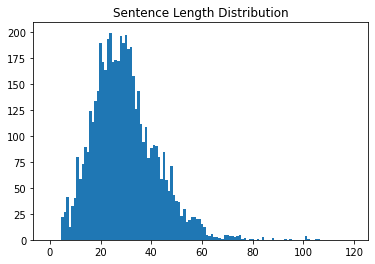

In [305]:
max_len = 120
min_len = 6

# 길이 조건에 맞는 문장만 선택합니다.
filtered_corpus = [s for s in tit if (len(s) < max_len) & (len(s) >= min_len)]

# 분포도를 다시 그려봅니다.
sentence_length = np.zeros((max_len), dtype=np.int)

for sen in filtered_corpus:
    sentence_length[len(sen)-1] += 1

plt.bar(range(max_len), sentence_length, width=1.0)
plt.title("Sentence Length Distribution")
plt.show()

In [306]:
import re                  # 정규표현식을 위한 Regex 지원 모듈 (문장 데이터를 정돈하기 위해) 
import numpy as np         # 변환된 문장 데이터(행렬)을 편하게 처리하기 위해
import tensorflow as tf    # 대망의 텐서플로우!
import os

In [309]:
def preprocess_sentence(sentence):
    sentence = sentence.lower().strip()       # 소문자로 바꾸고 양쪽 공백을 삭제
  
    # 아래 3단계를 거쳐 sentence는 스페이스 1개를 delimeter로 하는 소문자 단어 시퀀스로 바뀝니다.
#     sentence = re.sub(r"([?!,¿])", r" \1 ", sentence)        # 패턴의 특수문자를 만나면 특수문자 양쪽에 공백을 추가
    sentence = re.sub(r'[" "]+', " ", sentence)                  # 공백 패턴을 만나면 스페이스 1개로 치환
#    sentence = re.sub(r"[^a-zA-Z0-9ㄱ-ㅎ|가-힣?.!,+¿]+", " ", sentence)  # a-zA-Z0-9ㄱ-ㅎ|가-힣?.!,+¿ 패턴을 제외한 모든 문자(공백문자까지도)를 스페이스 1개로 치환

    sentence = sentence.strip()

    sentence = '<start> ' + sentence + ' <end>'      # 이전 스텝에서 본 것처럼 문장 앞뒤로 <start>와 <end>를 단어처럼 붙여 줍니다
    
    return sentence

print(preprocess_sentence("This is sample        sentence."))   # 이 문장이 어떻게 필터링되는지 되는것을 통해 확인

<start> this is sample sentence. <end>


In [310]:
corpus = []
new_corpus = []
bad_corpus = []

for sentence in tit:
    if len(sentence) == 0: continue        
    corpus.append(preprocess_sentence(sentence))
        
corpus[:10]

['<start> 아이패드 프로 4세대 11 셀룰러 256gb + 펜슬 2세대 <end>',
 '<start> 갤럭시탭s7+ 256기가 와이파이 실버 (정품키보드포함) 팝니다 <end>',
 '<start> 아이패드 에서 4 11인치 와이파이+셀룰러 256기가 새상품급 + 매직키보드폴리오 + 애플펜슬 패키지로 100만원에 드립니다. <end>',
 '<start> 아이패드에어4 256gb 셀룰러+ wifi 로즈골드 미개봉새상품 팝니다!!! <end>',
 '<start> 겔럭시 탭a 9.7 with s펜 <end>',
 '<start> 리디북스 리디페이퍼 3세대 전자책 팝니다 <end>',
 '<start> 삼성 갤럭시 탭a 10.5 풀박스 상태s 팔아요 <end>',
 '<start> [교환]아이패드 프로 4세대 256g wifi + 매직키보드 + 애플캐 + 애플팬슬2 + 담탁파우치(esr케이스도 있어요)를 맥북(m1) 교환원해요~ <end>',
 '<start> 갤럭시 탭 s4 wifi 256gb 33만 <end>',
 '<start> 아이패드 프로4세대 11인치 wifi 128g 미개봉 새제품 판매합니다. <end>']

In [368]:
for i in range((len(corpus))-1):
    if len(corpus[i].split(' ')) <= 15:
        new_corpus.append(corpus[i])
    else :
        bad_corpus.append(corpus[i])
        
print(bad_corpus[0])

<start> 아이패드 에서 4 11인치 와이파이+셀룰러 256기가 새상품급 + 매직키보드폴리오 + 애플펜슬 패키지로 100만원에 드립니다. <end>


In [329]:
def tokenize(corpus):
    # 텐서플로우에서 제공하는 Tokenizer 패키지를 생성
    tokenizer = tf.keras.preprocessing.text.Tokenizer(
        num_words= 12000,  # 전체 단어의 개수 
        filters=' ',    # 별도로 전처리 로직을 추가할 수 있습니다. 이번에는 사용하지 않겠습니다.
        oov_token="<unk>"  # out-of-vocabulary, 사전에 없었던 단어는 어떤 토큰으로 대체할지
    )
    tokenizer.fit_on_texts(corpus)   # 우리가 구축한 corpus로부터 Tokenizer가 사전을 자동구축하게 됩니다.

    # 이후 tokenizer를 활용하여 모델에 입력할 데이터셋을 구축하게 됩니다.
    tensor = tokenizer.texts_to_sequences(corpus)   # tokenizer는 구축한 사전으로부터 corpus를 해석해 Tensor로 변환합니다.

    # 입력 데이터의 시퀀스 길이를 일정하게 맞추기 위한 padding  메소드를 제공합니다.
    # maxlen의 디폴트값은 None입니다. 이 경우 corpus의 가장 긴 문장을 기준으로 시퀀스 길이가 맞춰집니다.
    tensor = tf.keras.preprocessing.sequence.pad_sequences(tensor,maxlen= 15, padding='post')  

    print(tensor,tokenizer)
    return tensor, tokenizer

tensor, tokenizer = tokenize(new_corpus)

[[   2    4    6 ...    0    0    0]
 [   2   70   41 ...    0    0    0]
 [   2  142   16 ...    0    0    0]
 ...
 [   2    4   68 ...    0    0    0]
 [   2  138   71 ...    0    0    0]
 [   2 1167   71 ...    0    0    0]] <keras_preprocessing.text.Tokenizer object at 0x7f038e4ce190>


In [330]:
src_input = tensor[:, :-1]  # tensor에서 마지막 토큰을 잘라내서 소스 문장을 생성합니다. 마지막 토큰은 <end>가 아니라 <pad>일 가능성이 높습니다.
tgt_input = tensor[:, 1:]    # tensor에서 <start>를 잘라내서 타겟 문장을 생성합니다.

print(src_input[0])
print(tgt_input[0])

[  2   4   6   9 110  10  16   8 105  26   3   0   0   0]
[  4   6   9 110  10  16   8 105  26   3   0   0   0   0]


In [331]:
src_input.shape
tgt_input.shape

(94446, 14)

In [332]:
from sklearn.model_selection import train_test_split
enc_train, enc_val, dec_train, dec_val = train_test_split(src_input,tgt_input,train_size = 0.8)

In [333]:
print("Source Train:", enc_train.shape)
print("Target Train:", dec_train.shape)

Source Train: (75556, 14)
Target Train: (75556, 14)


In [334]:
class TextGenerator(tf.keras.Model):
    def __init__(self, vocab_size, embedding_size, hidden_size):
        super(TextGenerator, self).__init__()
        
        self.embedding = tf.keras.layers.Embedding(vocab_size, embedding_size)
        self.rnn_1 = tf.keras.layers.LSTM(hidden_size, return_sequences=True)
        self.rnn_2 = tf.keras.layers.LSTM(hidden_size, return_sequences=True)

        self.linear = tf.keras.layers.Dense(vocab_size)
        
    def call(self, x):
        out = self.embedding(x)
        out = self.rnn_1(out)
        out = self.rnn_2(out)
        out = self.linear(out)
        
        return out
    
embedding_size = 512
hidden_size = 2048
model = TextGenerator(tokenizer.num_words + 1, embedding_size , hidden_size)

In [335]:
BUFFER_SIZE = len(src_input)
BATCH_SIZE = 256
steps_per_epoch = len(src_input) // BATCH_SIZE

VOCAB_SIZE = tokenizer.num_words + 1    # tokenizer가 구축한 단어사전 내 7000개와, 여기 포함되지 않은 0:<pad>를 포함하여 7001개

dataset = tf.data.Dataset.from_tensor_slices((enc_train, dec_train)).shuffle(BUFFER_SIZE)
dataset = dataset.batch(BATCH_SIZE, drop_remainder=True)
dataset

<BatchDataset shapes: ((256, 14), (256, 14)), types: (tf.int32, tf.int32)>

In [336]:
for src_sample, tgt_sample in dataset.take(1): break
model(src_sample)

<tf.Tensor: shape=(256, 14, 12001), dtype=float32, numpy=
array([[[-1.08557040e-04, -3.20876541e-04,  2.04402295e-05, ...,
         -4.46926279e-05, -1.63610050e-04,  1.58638242e-04],
        [-2.68322096e-04, -1.33161724e-04,  7.90673657e-05, ...,
         -2.38429231e-04, -1.66420883e-04,  3.19748651e-04],
        [-3.48647241e-04,  1.05487692e-04,  2.49745208e-04, ...,
         -8.08068493e-04, -6.13101758e-04,  5.98768311e-05],
        ...,
        [-7.97156361e-04,  1.64367130e-03,  2.26521073e-03, ...,
         -9.87452571e-04, -2.80882046e-03,  5.52497804e-04],
        [-9.30089271e-04,  1.70399097e-03,  2.49019847e-03, ...,
         -1.25144154e-03, -3.10377777e-03,  6.47728157e-04],
        [-1.05781772e-03,  1.77348230e-03,  2.67842272e-03, ...,
         -1.49764400e-03, -3.35857621e-03,  7.57708622e-04]],

       [[-1.08557040e-04, -3.20876541e-04,  2.04402295e-05, ...,
         -4.46926279e-05, -1.63610050e-04,  1.58638242e-04],
        [ 3.77336582e-05, -4.97493718e-04,  3

In [337]:
model.summary()

Model: "text_generator_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_17 (Embedding)     multiple                  6144512   
_________________________________________________________________
lstm_34 (LSTM)               multiple                  20979712  
_________________________________________________________________
lstm_35 (LSTM)               multiple                  33562624  
_________________________________________________________________
dense_17 (Dense)             multiple                  24590049  
Total params: 85,276,897
Trainable params: 85,276,897
Non-trainable params: 0
_________________________________________________________________


In [338]:
optimizer = tf.keras.optimizers.Adam()

loss = tf.keras.losses.SparseCategoricalCrossentropy(
    from_logits=True,
    reduction='none'
)

model.compile(loss=loss, optimizer=optimizer)
history  = model.fit(dataset,validation_data = (enc_val,dec_val), epochs=10)

Epoch 1/10
295/295 [==============================] - 125s 424ms/step - loss: 2.5626 - val_loss: 1.9066
Epoch 2/10
295/295 [==============================] - 121s 410ms/step - loss: 1.5591 - val_loss: 1.2633
Epoch 3/10
295/295 [==============================] - 121s 411ms/step - loss: 1.0778 - val_loss: 0.9279
Epoch 4/10
295/295 [==============================] - 121s 410ms/step - loss: 0.8215 - val_loss: 0.7446
Epoch 5/10
295/295 [==============================] - 121s 411ms/step - loss: 0.6937 - val_loss: 0.6647
Epoch 6/10
295/295 [==============================] - 122s 412ms/step - loss: 0.6454 - val_loss: 0.6378
Epoch 7/10
295/295 [==============================] - 122s 412ms/step - loss: 0.6284 - val_loss: 0.6254
Epoch 8/10
295/295 [==============================] - 121s 411ms/step - loss: 0.6204 - val_loss: 0.6184
Epoch 9/10
295/295 [==============================] - 121s 411ms/step - loss: 0.6162 - val_loss: 0.6148
Epoch 10/10
295/295 [==============================] - 134s 455m

In [339]:
generate_text(model, tokenizer, init_sentence="<start> 아이패드", max_len=20)


'<start> 아이패드 프로 4세대 11인치 128g 스그 <end> '

In [347]:
generate_text(model, tokenizer, init_sentence="<start> 화웨이", max_len= 20)


'<start> 화웨이 미디어패드 m5 8.4인치 게이밍 태블릿 s급 풀박 <end> '

In [341]:
generate_text(model, tokenizer, init_sentence="<start> 아이패드 에어", max_len=20)


'<start> 아이패드 에어 3세대 (64기가 + 셀룰러) + 정품 스마트 키보드 + 애플펜슬1세대 판매합니다 <end> '

In [342]:
generate_text(model, tokenizer, init_sentence="<start> 삼성", max_len=20)


'<start> 삼성 갤럭시 탭 s7+ 5g 12.4인치 256g <end> '

In [345]:
generate_text(model, tokenizer, init_sentence="<start> ipad", max_len=20)


'<start> ipad pro 12.9 32g 1세대실버+펜1세대 45만 팔아요 <end> '

In [346]:
generate_text(model, tokenizer, init_sentence="<start> 갤럭시", max_len=20)


'<start> 갤럭시 탭 s7+ 블랙 256gb lte모델 팝니다 <end> '